In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import warnings
warnings.filterwarnings('ignore')

In [4]:
origin_data = pd.read_csv("D:\Jupyter_documents\Kaggle_churn\data\Telecom_customer churn.csv")

In [5]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
rev_Mean            99643 non-null float64
mou_Mean            99643 non-null float64
totmrc_Mean         99643 non-null float64
da_Mean             99643 non-null float64
ovrmou_Mean         99643 non-null float64
ovrrev_Mean         99643 non-null float64
vceovr_Mean         99643 non-null float64
datovr_Mean         99643 non-null float64
roam_Mean           99643 non-null float64
change_mou          99109 non-null float64
change_rev          99109 non-null float64
drop_vce_Mean       100000 non-null float64
drop_dat_Mean       100000 non-null float64
blck_vce_Mean       100000 non-null float64
blck_dat_Mean       100000 non-null float64
unan_vce_Mean       100000 non-null float64
unan_dat_Mean       100000 non-null float64
plcd_vce_Mean       100000 non-null float64
plcd_dat_Mean       100000 non-null float64
recv_vce_Mean       100000 non-null float64
recv_sms_Mean       

In [6]:
origin_data.shape

(100000, 100)

In [7]:
df = origin_data.groupby('churn')
df = df['churn'].count()
df

churn
0    50438
1    49562
Name: churn, dtype: int64

数据质量检查

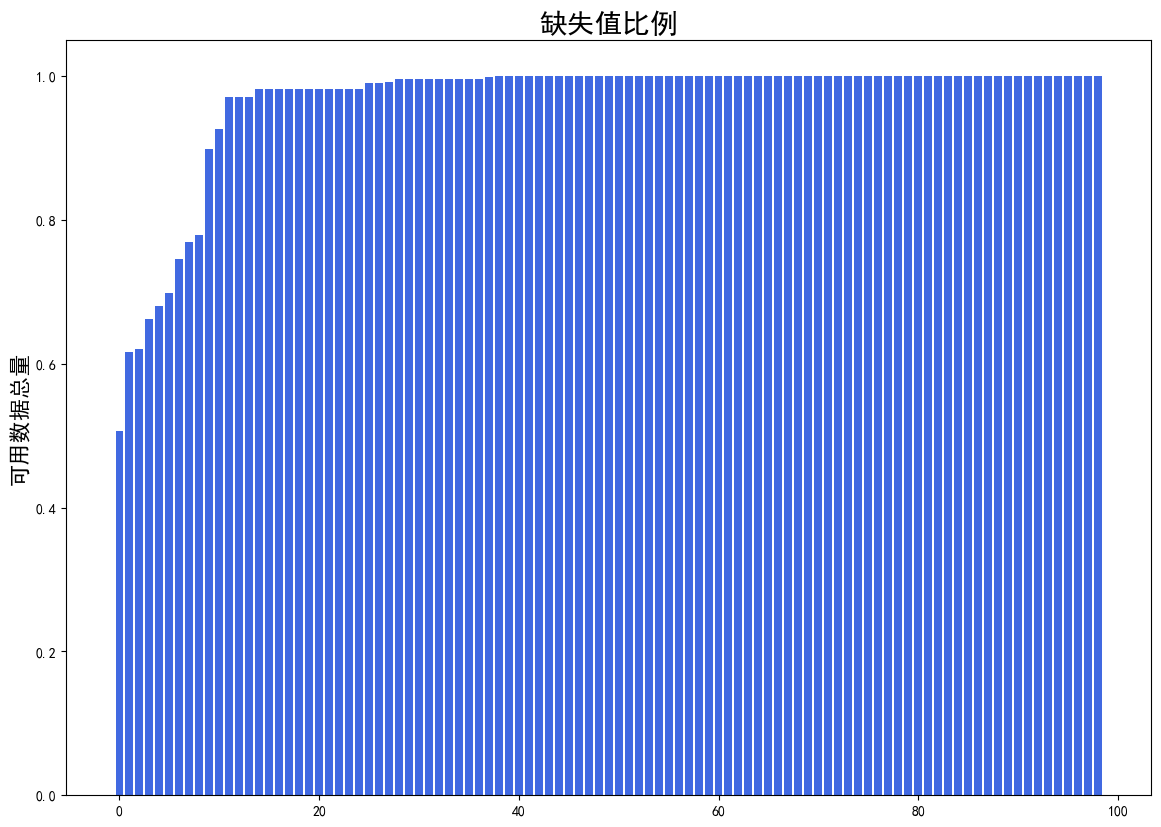

In [8]:
#缺失值的统计
data = (origin_data.count() / len(origin_data)).drop('churn').sort_values().values
ind = np.arange(len(data))

fig, axes = plt.subplots(1,1,figsize=(14, 10), dpi=100)
axes.bar(ind, data, color='royalblue')

axes.set_ylabel('可用数据总量',fontsize=16);
axes.set_title('缺失值比例',fontsize=20)
plt.savefig("缺失值统计.jpg")
plt.show()

电信呼叫和使用状况

In [9]:
def dist_plot(colname, spilt_point):
    '''分别画出正常用户和流失用户的分布图
       @param colname: 原始数据的列名
       @param spilt_point: 标注的点
    '''
    from scipy import stats

    fig, ax = plt.subplots(2, 1, figsize=(12,10))

    not_churn = origin_data[origin_data['churn']==0][colname]
    not_churn = not_churn[-pd.isnull(not_churn)] # 去除空值
    churn = origin_data[origin_data['churn']==1][colname]
    churn = churn[-pd.isnull(churn)] 

    print('%.2f%%的正常用户'%stats.percentileofscore(not_churn, spilt_point)+colname+'低于%i'%spilt_point)
    print('%.2f%%的流失用户'%stats.percentileofscore(churn, spilt_point)+colname+'低于%i'%spilt_point)

    sns.lineplot(range(len(sorted(not_churn))),sorted(not_churn), ax=ax[0], color='r')
    # 添加标注
    y0 = spilt_point
    x0 = len(not_churn)*stats.percentileofscore(not_churn, y0)/100
    ax[0].vlines(x0, 0, y0, colors = "k", linestyles = "dashed")
    ax[0].hlines(y0, 0, x0, colors = "k", linestyles = "dashed")
    ax[0].scatter([x0, ], [y0, ], s=50, color='k')
    ax[0].annotate('%.2f%%的正常用户'%stats.percentileofscore(not_churn, spilt_point)+colname+'低于%i'%spilt_point,
                 xy=(x0, y0), xytext=(-250, +30),
                 textcoords='offset points', fontsize=16,horizontalalignment='left')
    ax[0].set_title(colname+'分布', fontsize=14)
    ax[0].set_ylabel(colname, fontsize=14)
    ax[0].set_xlabel('用户', fontsize=14)


    sns.lineplot(range(len(sorted(churn))),sorted(churn), ax=ax[1], color='b')
    # 添加标注
    y0 = spilt_point
    x0 = len(churn)*stats.percentileofscore(churn, y0)/100
    ax[1].vlines(x0, 0, y0, colors = "k", linestyles = "dashed")
    ax[1].hlines(y0, 0, x0, colors = "k", linestyles = "dashed")
    ax[1].scatter([x0, ], [y0, ], s=50, color='k')
    ax[1].annotate('%.2f%%的流失用户'%stats.percentileofscore(churn, spilt_point)+colname+'低于%i'%spilt_point,
             xy=(x0, y0), xytext=(-250, +30),
             textcoords='offset points', fontsize=16,horizontalalignment='left')
    ax[1].set_title(colname+'分布', fontsize=14)
    ax[1].set_ylabel(colname, fontsize=14)
    ax[1].set_xlabel('用户', fontsize=14)

    plt.savefig(colname+'分布图.jpg')
    plt.show()

99.40%的正常用户drop_vce_Mean低于50
99.45%的流失用户drop_vce_Mean低于50


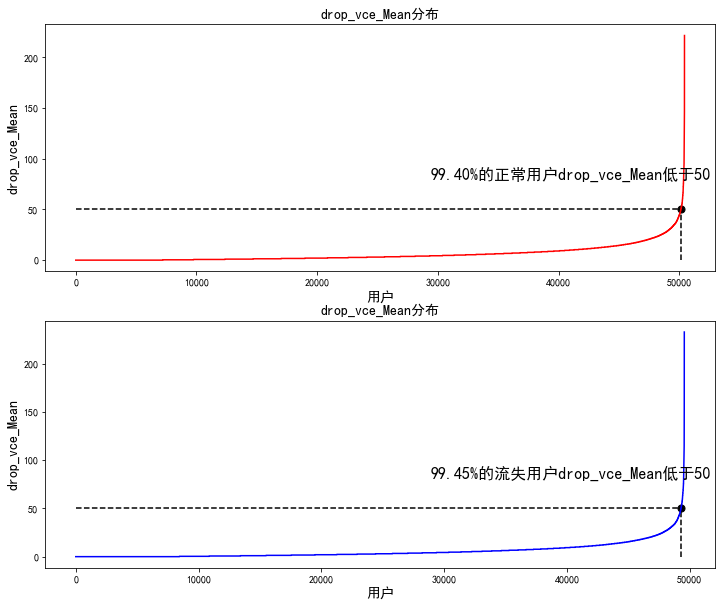

In [10]:
dist_plot('drop_vce_Mean', 50)

99.99%的正常用户drop_dat_Mean低于20
99.99%的流失用户drop_dat_Mean低于20


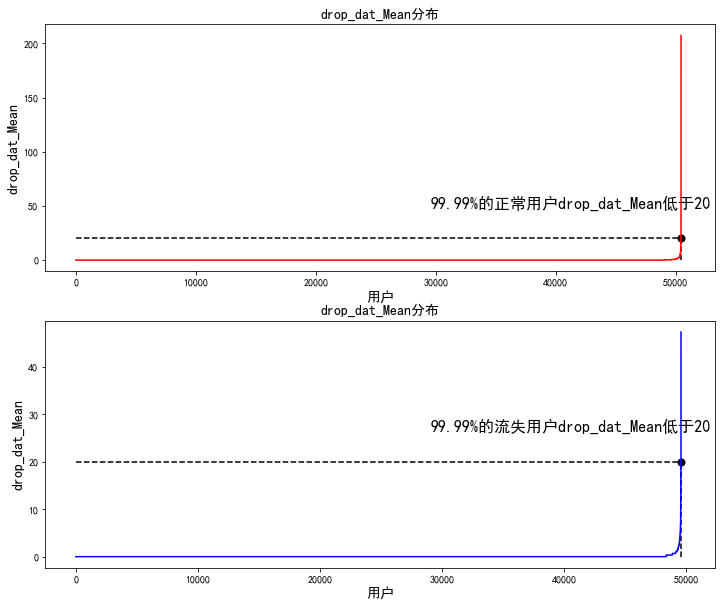

In [11]:
dist_plot('drop_dat_Mean', 20)

99.66%的正常用户comp_dat_Mean低于50
99.72%的流失用户comp_dat_Mean低于50


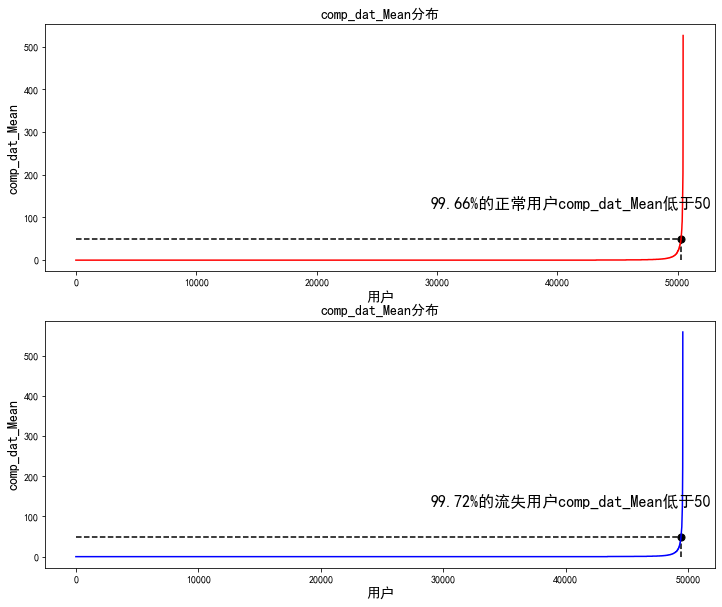

In [12]:
dist_plot('comp_dat_Mean', 50)

85.37%的正常用户avg6mou低于1000
87.55%的流失用户avg6mou低于1000


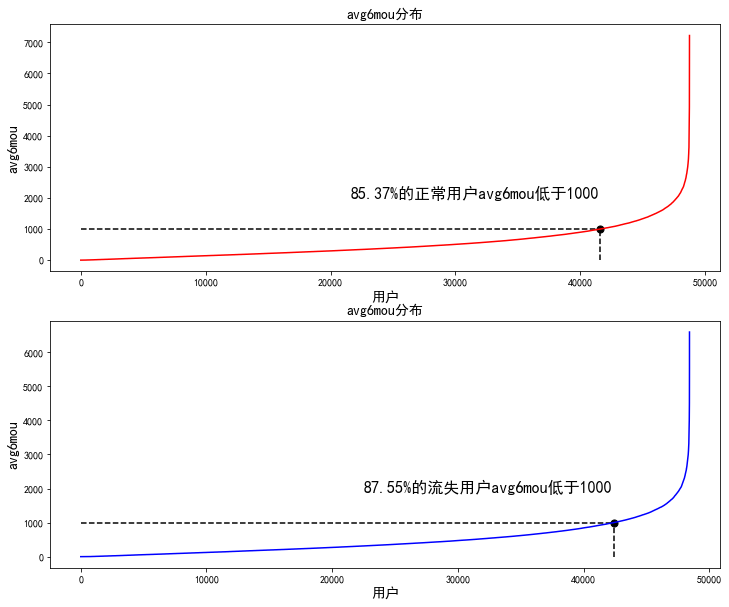

In [13]:
dist_plot('avg6mou', 1000)

99.61%的正常用户change_mou低于1000
99.55%的流失用户change_mou低于1000


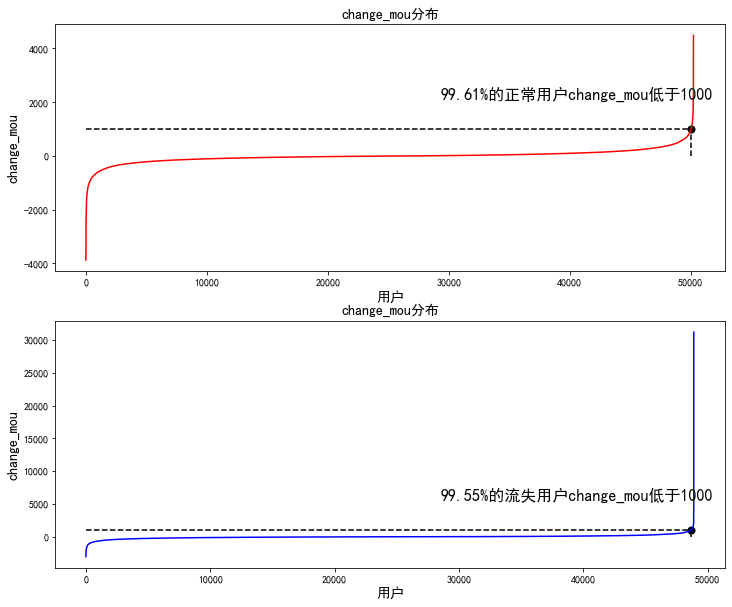

In [14]:
dist_plot('change_mou', 1000)

消费情况

99.83%的正常用户rev_Mean低于400
99.87%的流失用户rev_Mean低于400


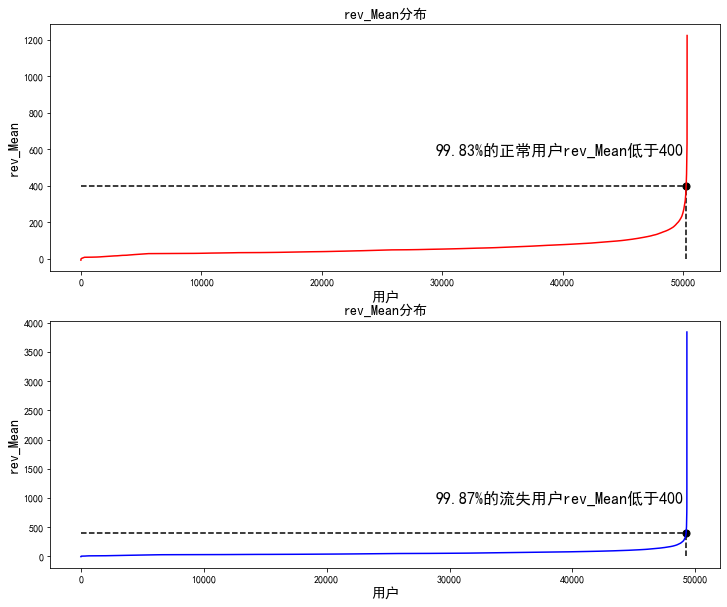

In [15]:
dist_plot('rev_Mean', 400)

88.42%的正常用户avg3rev低于100
88.84%的流失用户avg3rev低于100


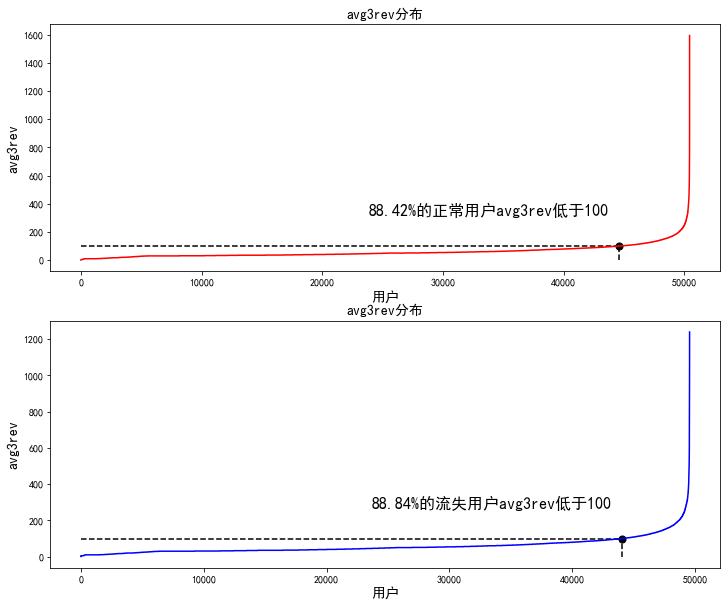

In [16]:
dist_plot('avg3rev', 100)

家庭状况

50.80%的正常用户income低于6
50.02%的流失用户income低于6


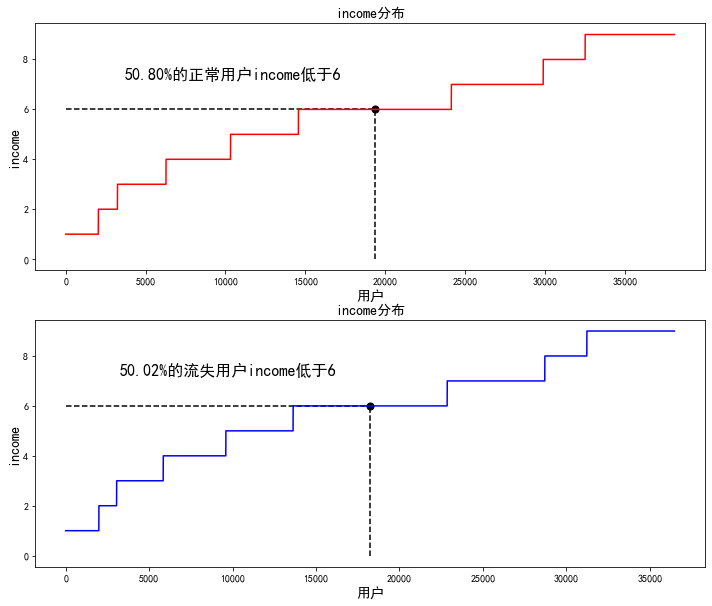

In [17]:
dist_plot('income', 6)

87.04%的正常用户hnd_price低于150
90.87%的流失用户hnd_price低于150


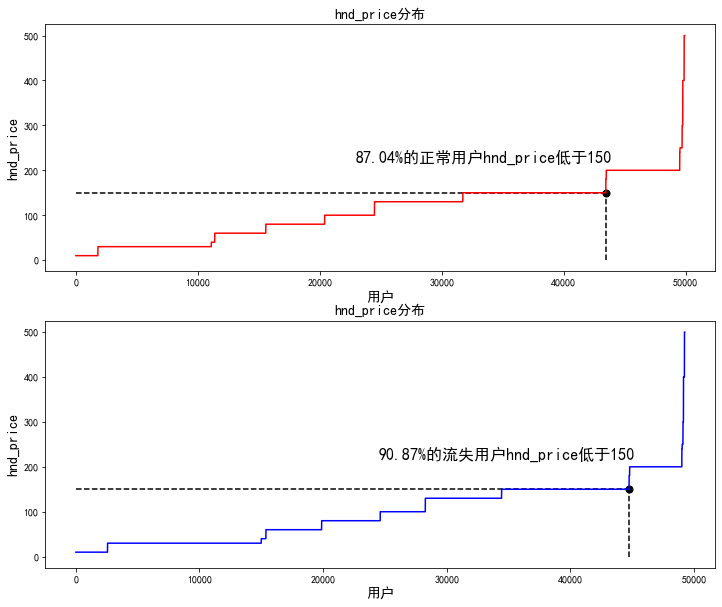

In [18]:
dist_plot('hnd_price', 150)

特征的相关性分析

In [19]:
data_crr = origin_data[[col for col in origin_data.columns.tolist() if col not in ['churn','Customer_ID']]].corr()
data_crr

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays
rev_Mean,1.000000,0.706029,0.602148,0.403806,0.772117,0.776647,0.772159,0.152664,0.374718,0.075835,...,0.228117,0.225320,-0.035863,-0.010322,-0.056251,-0.033564,-0.040699,0.001509,-0.038434,-0.213402
mou_Mean,0.706029,1.000000,0.575567,0.394583,0.575611,0.541250,0.539811,0.090349,0.125442,-0.008211,...,0.291907,0.286538,-0.054795,-0.027519,-0.063562,-0.023166,-0.093709,0.013006,-0.051355,-0.315322
totmrc_Mean,0.602148,0.575567,1.000000,0.306966,0.200732,0.164401,0.163038,0.035428,0.046865,-0.020845,...,0.223322,0.219285,-0.035703,-0.016609,-0.053149,-0.034945,-0.026211,0.004181,-0.034726,-0.247781
da_Mean,0.403806,0.394583,0.306966,1.000000,0.304596,0.274344,0.274162,0.040290,0.044899,-0.021603,...,0.168919,0.160514,-0.032306,-0.007566,-0.042996,-0.037116,0.032336,-0.000643,-0.021007,-0.120649
ovrmou_Mean,0.772117,0.575611,0.200732,0.304596,1.000000,0.956056,0.953231,0.162933,0.040371,-0.011172,...,0.141164,0.140901,-0.024408,-0.003892,-0.037157,-0.020575,-0.030198,-0.000350,-0.026663,-0.127763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adults,-0.033564,-0.023166,-0.034945,-0.037116,-0.020575,-0.021399,-0.021327,-0.003055,-0.001428,-0.002512,...,-0.001800,0.002282,0.260806,0.162654,0.366560,1.000000,0.089325,0.237031,0.112912,0.011267
income,-0.040699,-0.093709,-0.026211,0.032336,-0.030198,-0.038617,-0.037516,-0.015531,-0.008839,-0.008239,...,-0.047666,-0.043265,0.037975,0.086854,0.068491,0.089325,1.000000,0.069197,0.088237,0.105680
numbcars,0.001509,0.013006,0.004181,-0.000643,-0.000350,-0.000347,0.000074,-0.004351,-0.005464,0.000997,...,0.006111,0.013237,0.027228,0.014937,0.113999,0.237031,0.069197,1.000000,0.025110,-0.019281
forgntvl,-0.038434,-0.051355,-0.034726,-0.021007,-0.026663,-0.028010,-0.028211,-0.001937,-0.005337,0.005273,...,-0.009672,-0.010085,0.040533,0.046756,0.072458,0.112912,0.088237,0.025110,1.000000,0.046153


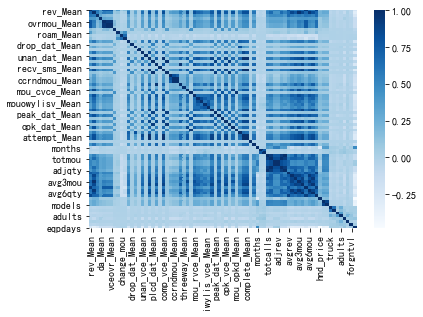

In [20]:
sns.heatmap(data_crr, cmap='Blues')
plt.savefig('热力图.jpg')
plt.show()

In [21]:
data_crr = origin_data[[col for col in origin_data.columns.tolist() if col not in ['Customer_ID']]].corr()
data_crr[abs(data_crr['churn'])>0.05]['churn']

mou_Mean        -0.057027
totmrc_Mean     -0.068558
comp_vce_Mean   -0.051574
mou_cvce_Mean   -0.052042
complete_Mean   -0.051740
churn            1.000000
hnd_price       -0.103184
eqpdays          0.112691
Name: churn, dtype: float64

数据准备

In [22]:
# 由于特征较多，缺失值比例大于3%的特征直接剔除
del_cols = ['ownrent','lor','dwlltype','adults','infobase','income','numbcars','HHstatin','dwllsize',
           'prizm_social_one','hnd_webcap','churn','Customer_ID']
target = origin_data['churn']
df = origin_data[[col for col in origin_data.columns.tolist() if col not in del_cols]]
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,marital,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,S,0.0,N,U,U,U,U,U,Y,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,S,0.0,Z,U,U,U,U,U,Y,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,M,0.0,N,U,Y,U,U,U,Y,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,M,0.0,U,Y,U,U,U,U,Y,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,S,0.0,I,U,U,U,U,U,Y,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,M,0.0,S,U,U,U,Y,U,Y,773.0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,M,0.0,N,U,U,Y,Y,Y,Y,835.0
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B,0.0,U,Y,Y,U,U,U,N,433.0
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,U,0.0,S,U,U,U,U,U,N,75.0


In [23]:
categ_cols = ['months','uniqsubs','actvsubs','new_cell','crclscod','asl_flag','area','dualband','refurb_new',
              'ethnic','kid0_2','kid3_5','kid6_10','kid11_15','kid16_17','creditcd','marital']
numeric_cols = [col for col in df.columns.tolist() if col not in categ_cols]

In [24]:
# 类别变量用Unknown填充，自成一类
for col in categ_cols:
    if len(df[df[col].isnull()][col]) != 0:
        print('starting filling '+col+'...')
        df[col] = df[col].fillna('Unknown')
        print(col+'  done!')
        
# 这里的填充和训练集测试集的划分无关，因此一并进行填充处理

starting filling area...
area  done!
starting filling dualband...
dualband  done!
starting filling refurb_new...
refurb_new  done!
starting filling ethnic...
ethnic  done!
starting filling kid0_2...
kid0_2  done!
starting filling kid3_5...
kid3_5  done!
starting filling kid6_10...
kid6_10  done!
starting filling kid11_15...
kid11_15  done!
starting filling kid16_17...
kid16_17  done!
starting filling creditcd...
creditcd  done!
starting filling marital...
marital  done!


In [25]:
# 连续变量用lgb方法填充

import lightgbm as lgb

params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'rmse'},
            'subsample': 0.4,
            'subsample_freq': 1,
            'learning_rate': 0.3,
            'num_leaves': 40,
            'feature_fraction': 0.75,
            'lambda_l1': 1,
            'lambda_l2': 1
            }

def lgb_fillna(colname):
    
    df_temp = df[numeric_cols]
    te = df_temp[df_temp[colname].notnull()] # 非空的该列对应的行
    te_X = te[[col for col in numeric_cols if col!=colname]]
    te_Y = te[colname]
    te_X = te_X.astype(float)
    te_Y = te_Y.astype(float)
    
    tr = df_temp[df_temp[colname].isnull()]
    tr_X = tr[[col for col in numeric_cols if col!=colname]]
    tr_Y = tr[colname]
    tr_X = tr_X.astype(float)
    tr_Y = tr_Y.astype(float)
    lgb_train = lgb.Dataset(te_X, te_Y)
    gbm = lgb.train(params,lgb_train)
    pr = gbm.predict(tr_X)
    
    # 赋值
    df.loc[df[colname].isnull(), colname] = list(pr)

In [26]:
for col in numeric_cols:
    if len(df[df[col].isnull()][col]) != 0:
        print('starting filling '+col+'...')
        lgb_fillna(col)
        print(col+'  done!')

starting filling rev_Mean...
rev_Mean  done!
starting filling mou_Mean...
mou_Mean  done!
starting filling totmrc_Mean...
totmrc_Mean  done!
starting filling da_Mean...
da_Mean  done!
starting filling ovrmou_Mean...
ovrmou_Mean  done!
starting filling ovrrev_Mean...
ovrrev_Mean  done!
starting filling vceovr_Mean...
vceovr_Mean  done!
starting filling datovr_Mean...
datovr_Mean  done!
starting filling roam_Mean...
roam_Mean  done!
starting filling change_mou...
change_mou  done!
starting filling change_rev...
change_rev  done!
starting filling avg6mou...
avg6mou  done!
starting filling avg6qty...
avg6qty  done!
starting filling avg6rev...
avg6rev  done!
starting filling hnd_price...
hnd_price  done!
starting filling phones...
phones  done!
starting filling models...
models  done!
starting filling truck...
truck  done!
starting filling rv...
rv  done!
starting filling forgntvl...
forgntvl  done!
starting filling eqpdays...
eqpdays  done!


In [27]:
# 缺失值填充完成
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,marital,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,S,0.0,N,U,U,U,U,U,Y,361.0
1,57.492500,482.750000,37.425000,0.247500,22.750000,9.100000,9.100000,0.000000,0.000000,532.250000,...,S,0.0,Z,U,U,U,U,U,Y,240.0
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,M,0.0,N,U,Y,U,U,U,Y,1504.0
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,M,0.0,U,Y,U,U,U,U,Y,1812.0
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,S,0.0,I,U,U,U,U,U,Y,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.759148,121.999310,3.293338,0.184179,1.797537,0.119844,-0.364468,0.047131,-0.921200,-123.090877,...,M,0.0,S,U,U,U,Y,U,Y,773.0
99996,17.010609,377.778818,18.036193,0.786393,1.797537,0.105727,-0.364468,0.047131,-4.752467,-19.924987,...,M,0.0,N,U,U,Y,Y,Y,Y,835.0
99997,3.346619,210.887722,3.146813,0.233533,1.797537,0.105727,-0.090344,0.055458,1.486890,-354.436891,...,B,0.0,U,Y,Y,U,U,U,N,433.0
99998,86.460559,556.754584,82.807359,1.688719,-1.176898,-0.297388,0.300239,1.020286,0.507658,-391.804407,...,U,0.0,S,U,U,U,U,U,N,75.0


In [28]:
# labelencoder编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categ_cols:
    df[col] = le.fit_transform(df[col])

In [29]:
# 编码完成
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,marital,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,3,0.0,9,0,0,0,0,0,2,361.0
1,57.492500,482.750000,37.425000,0.247500,22.750000,9.100000,9.100000,0.000000,0.000000,532.250000,...,3,0.0,17,0,0,0,0,0,2,240.0
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,2,0.0,9,0,2,0,0,0,2,1504.0
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,2,0.0,14,2,0,0,0,0,2,1812.0
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,3,0.0,6,0,0,0,0,0,2,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.759148,121.999310,3.293338,0.184179,1.797537,0.119844,-0.364468,0.047131,-0.921200,-123.090877,...,2,0.0,13,0,0,0,2,0,2,773.0
99996,17.010609,377.778818,18.036193,0.786393,1.797537,0.105727,-0.364468,0.047131,-4.752467,-19.924987,...,2,0.0,9,0,0,2,2,2,2,835.0
99997,3.346619,210.887722,3.146813,0.233533,1.797537,0.105727,-0.090344,0.055458,1.486890,-354.436891,...,1,0.0,14,2,2,0,0,0,0,433.0
99998,86.460559,556.754584,82.807359,1.688719,-1.176898,-0.297388,0.300239,1.020286,0.507658,-391.804407,...,4,0.0,13,0,0,0,0,0,0,75.0


In [30]:
# 训练集测试集的划分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 87)
(30000, 87)
(70000,)
(30000,)


In [31]:
# 特征聚类
from sklearn.cluster import KMeans
estimator = KMeans(n_clusters=10)
estimator.fit(x_train[numeric_cols].T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
estimator.labels_

array([7, 4, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 5,
       7, 7, 7, 7, 7, 7, 9, 7, 5, 7, 7, 7, 7, 5, 7, 5, 7, 7, 7, 9, 7, 7,
       5, 5, 7, 7, 2, 1, 3, 3, 1, 2, 7, 8, 5, 4, 5, 7, 4, 5, 7, 7, 7, 7,
       7, 7, 7, 6])

神经网络模型建立

In [33]:
kmeans_cols = ['rev_Mean', 'totmou', 'totcalls', 'avg3mou', 'totrev', 'mou_cvce_Mean', 'avg3qty', 'eqpdays', 'change_mou', 'adjmou']
x_nn_train = x_train[kmeans_cols+categ_cols]
y_nn_train = y_train
x_nn_test = x_test[kmeans_cols+categ_cols]
y_nn_test = y_test

In [34]:
x_nn_train.shape

(70000, 27)

In [35]:
%%time

import tensorflow as tf

num_classes = 1 # 输出大小
input_size = 27 # 输入大小
hidden_units_size = 10 # 隐藏层节点个数

learning_rate = 0.001 # 学习率
scale = 0.01 # 正则化系数值
epoches = 4
batch_size = 100 # 批大小
training_iterations = 5000 # 迭代次数

X = tf.placeholder(tf.float32, shape=[None, input_size])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

W1 = tf.Variable(tf.random_normal([input_size, hidden_units_size], stddev=0.33))
B1 = tf.Variable(tf.random_normal([hidden_units_size], stddev=0.33))
W2 = tf.Variable(tf.random_normal([hidden_units_size, num_classes], stddev=0.33))
B2 = tf.Variable(tf.random_normal([num_classes], stddev=0.33))

hidden_opt = tf.nn.relu(tf.matmul(X, W1)+B1) # 输入层到隐藏层正向传播
final_opt = tf.nn.sigmoid(tf.matmul(hidden_opt, W2)+B2) # 隐藏层到输出层正向传播

# 添加正则项
tf.add_to_collection(tf.GraphKeys.WEIGHTS, W1)
tf.add_to_collection(tf.GraphKeys.WEIGHTS, B1)
tf.add_to_collection(tf.GraphKeys.WEIGHTS, W2)
tf.add_to_collection(tf.GraphKeys.WEIGHTS, B2)
regularizer = tf.contrib.layers.l2_regularizer(scale)
reg_term = tf.contrib.layers.apply_regularization(regularizer)
# 对输出层计算交叉熵损失
loss = -tf.reduce_mean(Y*tf.log(tf.clip_by_value(final_opt,1e-10,1.0))+(1-Y)*tf.log(tf.clip_by_value(1-final_opt,1e-10,1.0)))+reg_term
# 梯度下降算法，这里使用反向传播算法用于修改权重，减小损失
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)
# 初始化变量
init = tf.global_variables_initializer()

# 创建会话运行Tensorflow程序
sess = tf.Session()
sess.run(init)
for epoch in range(epoches):
    print("epoch = ", epoch)
    for i in range(training_iterations):
        # 每次选取batch_size个样本进行训练
        start = (i*batch_size)%70000
        end = min(start+batch_size, 70000)
        batch_input = x_nn_train[start:end]
        batch_labels = np.array(y_nn_train[start:end]).reshape(batch_size,1)
        # 训练
        training_loss = sess.run([opt, loss], feed_dict={X:batch_input, Y:batch_labels})
        if i % 1000 == 0:
            total_cross_entropy = sess.run(loss, feed_dict={X:x_nn_train, Y:np.array(y_nn_train).reshape(70000,1)})
            print("step:%d, total_cross entropy=%g"%(i, total_cross_entropy))

epoch =  0
step:0, total_cross entropy=11.6379
step:1000, total_cross entropy=10.4478
step:2000, total_cross entropy=5.58524
step:3000, total_cross entropy=3.01384
step:4000, total_cross entropy=2.59856
epoch =  1
step:0, total_cross entropy=2.10252
step:1000, total_cross entropy=1.15642
step:2000, total_cross entropy=0.906063
step:3000, total_cross entropy=1.43948
step:4000, total_cross entropy=0.838347
epoch =  2
step:0, total_cross entropy=0.73719
step:1000, total_cross entropy=0.763909
step:2000, total_cross entropy=0.837649
step:3000, total_cross entropy=0.76089
step:4000, total_cross entropy=0.845251
epoch =  3
step:0, total_cross entropy=0.931107
step:1000, total_cross entropy=0.789842
step:2000, total_cross entropy=2.11688
step:3000, total_cross entropy=0.764718
step:4000, total_cross entropy=0.98549
Wall time: 40.5 s


In [36]:
sess.run(final_opt, feed_dict={X:x_nn_test})

array([[0.6019561 ],
       [0.84185857],
       [0.63349366],
       ...,
       [0.5665479 ],
       [0.63345635],
       [0.60503256]], dtype=float32)

测试集评估

Precision 0.5034436947173373
Recall 0.9628886659979939
f1_score 0.6611873823407869
confusion_matrix
[[  842 14203]
 [  555 14400]]


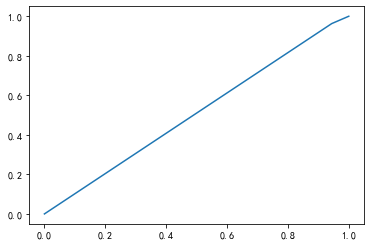

In [37]:
# 对输出层计算各项分类评价指标
from sklearn import metrics

pred_Y = sess.run(final_opt, feed_dict={X:x_nn_test})
for i in range(len(pred_Y)):
    if pred_Y[i]>=0.4:
        pred_Y[i] = 1
    else:
        pred_Y[i] = 0       

def eva(y_test, pred_Y):
    print("Precision", metrics.precision_score(y_test, pred_Y))
    print("Recall", metrics.recall_score(y_test, pred_Y))
    print("f1_score", metrics.f1_score(y_test, pred_Y))
    print("confusion_matrix")
    print(metrics.confusion_matrix(y_test, pred_Y))
    fpr, tpr, tresholds = metrics.roc_curve(y_test, pred_Y)
    plt.plot(fpr, tpr)
    
eva(y_nn_test, pred_Y)

随机森林

In [68]:
%%time
from sklearn.ensemble import RandomForestClassifier
# rf框架参数
n_estimators = 100
oob_score = True
# rf决策树参数
max_depth = 100 # 10-100
min_samples_split = 3
min_samples_leaf = 3

rf = RandomForestClassifier(n_estimators=n_estimators,
                           oob_score=oob_score,
                           max_depth=max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf)
rf.fit(x_nn_train, y_nn_train)
pred_Y = rf.predict(x_nn_test)

Wall time: 36.9 s


Precision 0.6114044350580782
Recall 0.6194583751253762
f1_score 0.6154050553027536
confusion_matrix
[[9157 5888]
 [5691 9264]]


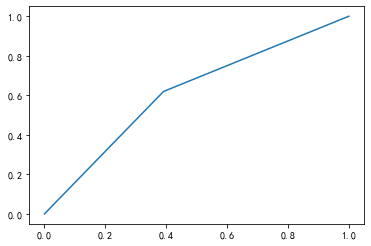

In [69]:
eva(y_nn_test, pred_Y)

Logistic回归

In [40]:
%%time
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression()
lgreg.fit(x_nn_train, y_nn_train)
pred_Y = lgreg.predict(x_nn_test)

Wall time: 7.87 s


Precision 0.5715246485977538
Recall 0.5682380474757606
f1_score 0.5698766094420601
confusion_matrix
[[8674 6371]
 [6457 8498]]


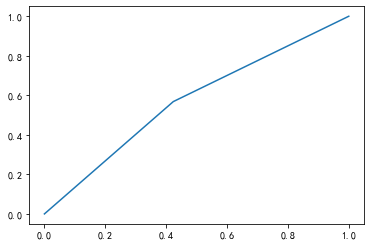

In [41]:
eva(y_nn_test, pred_Y)

决策树

In [42]:
%%time
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier()
treemodel.fit(x_nn_train,y_nn_train)
pred_Y = treemodel.predict(x_nn_test)

Wall time: 2.47 s


Precision 0.5437116046715723
Recall 0.5385489802741558
f1_score 0.541117979037893
confusion_matrix
[[8286 6759]
 [6901 8054]]


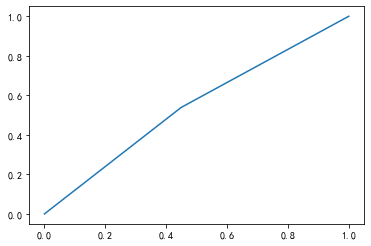

In [43]:
eva(y_nn_test, pred_Y)

K近邻

In [44]:
%%time
from sklearn.neighbors import KNeighborsClassifier
KNmodel=KNeighborsClassifier()
KNmodel.fit(x_nn_train,y_nn_train)
pred_Y = KNmodel.predict(x_nn_test)

Wall time: 7 s


Precision 0.5320395201129146
Recall 0.5041123370110331
f1_score 0.5176995708154506
confusion_matrix
[[8414 6631]
 [7416 7539]]


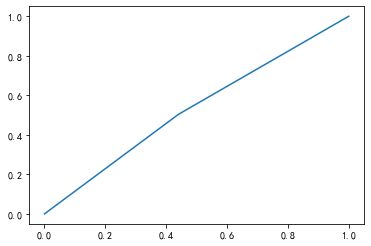

In [45]:
eva(y_nn_test, pred_Y)

SVM

In [46]:
%%time
from sklearn.svm import SVC
svcmodel=SVC(kernel='sigmoid')
svcmodel.fit(x_nn_train,y_nn_train)
pred_Y = svcmodel.predict(x_nn_test)

Wall time: 8min 2s


Precision 0.0
Recall 0.0
f1_score 0.0
confusion_matrix
[[15045     0]
 [14955     0]]


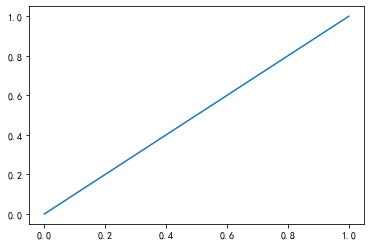

In [47]:
eva(y_nn_test, pred_Y)